# Homework set 4

Please **submit this Jupyter notebook through Canvas** no later than **Monday December 9, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Zoë Azra Blei 15762467 

Costanza D'Ercole 15424596

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

k=0, m=1, Approximation=49950.000050, Error=4.990000e+04
k=1, m=2, Approximation=24975.000423, Error=2.492500e+04
k=2, m=4, Approximation=12487.501855, Error=1.243750e+04
k=3, m=8, Approximation=6243.757494, Error=6.193758e+03
k=4, m=16, Approximation=3121.904490, Error=3.071905e+03
k=5, m=32, Approximation=1561.050738, Error=1.511051e+03
k=6, m=64, Approximation=780.886154, Error=7.308862e+02
k=7, m=128, Approximation=391.662953, Error=3.416630e+02
k=8, m=256, Approximation=199.419975, Error=1.494200e+02
k=9, m=512, Approximation=108.215472, Error=5.821552e+01
k=10, m=1024, Approximation=69.373823, Error=1.937387e+01
k=11, m=2048, Approximation=55.558404, Error=5.558454e+00
k=12, m=4096, Approximation=51.459191, Error=1.459241e+00
k=13, m=8192, Approximation=50.369918, Error=3.699681e-01
k=14, m=16384, Approximation=50.092781, Error=9.283133e-02
k=15, m=32768, Approximation=50.023179, Error=2.322933e-02
k=16, m=65536, Approximation=50.005759, Error=5.808681e-03
k=17, m=131072, Approxi

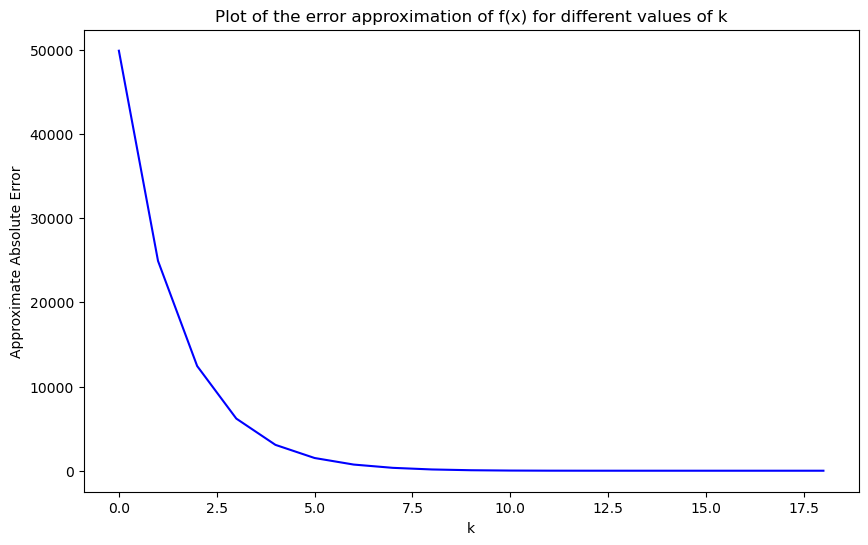

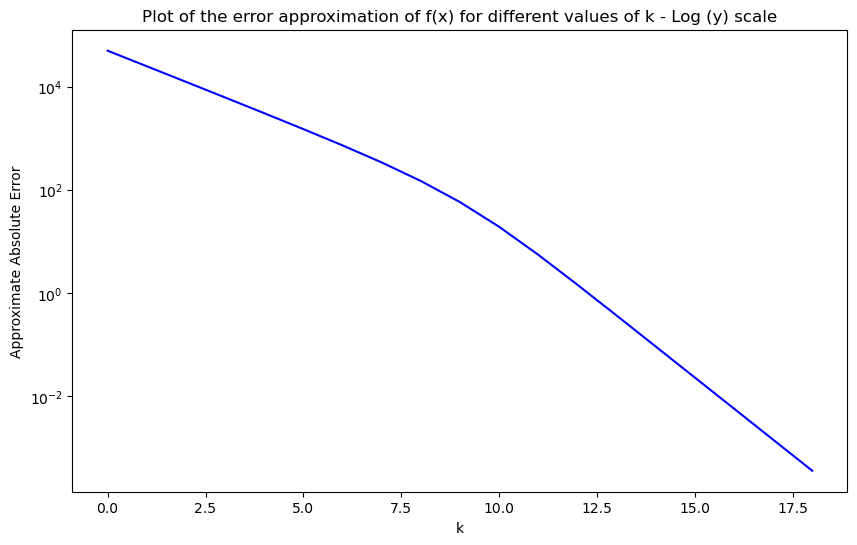

In [ ]:
# Defining the function
def f(x):
    return x**(-3)


def trapezoid(f, a, b, m):
    """
    Approximates the integral of a function using the composite trapezoidal rule.

    Parameters:
    f : The function to integrate.
    a : The lower limit of integration.
    b : The upper limit of integration.
    m : The number of subintervals.

    Returns: The approximate value of the integral of `f` over [a, b].
    """
    lngth_interv = (b - a) / m
    a0 = a
    area_sum = 0
    for _ in range(m):
        b0 = a0 + lngth_interv
        area = (lngth_interv * (f(a0) + f(b0)) / 2)
        area_sum += area
        a0 = b0
    return area_sum

# Analytical integral of f(x)
def exact_integral(a, b):
    return (-(1 / (2 * b**2)) + (1 / (2 * a**2)))

a, b = 1/10, 100
exact_value = exact_integral(a, b)
epsilon = 1e-3  
k_max = 20  
errors = []
k_values = []

for k_value in range(k_max):
    m = 2**k_value
    area_approx = trapezoid(f, a, b, m)
    error = np.abs(area_approx - exact_value)
    errors.append(error)
    k_values.append(k_value)
    
    print(f"k={k_value}, m={m}, Approximation={area_approx:.6f}, Error={error:.6e}")
    if error < epsilon:
        print(f"Smallest k with error < {epsilon}: {k_value}")
        break

plt.figure(figsize=(10,6))
plt.plot(k_values,errors, label='',color='b')
plt.xlabel("k")
plt.ylabel("Approximate Absolute Error")
plt.title("Plot of the error approximation of f(x) for different values of k")
plt.show()

# Log y plot for visualization purposes
plt.figure(figsize=(10,6))
plt.semilogy(k_values,errors, label='',color='b')
plt.xlabel("k")
plt.ylabel("Approximate Absolute Error")
plt.title("Plot of the error approximation of f(x) for different values of k - Log (y) scale")
plt.show()


The slow convergence arises mainly bevcause of the function behavior for different values of x. When x is small (lower part of the  integration interval), the function is very steep, making it difficult for the trapezoidal rule to accurately approximate the 
area of each trapezoid. This occurs because the function values change significantly within each subinterval, causing the linear approximation to poorly caputre the function's behavior in these regions.

As k increases, the initial error reduction is significant due to the higher number of subintervals, but the convergence slows considerably as the approximation becomes more accurate. 

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).


We know that a general trapezoidal rule with $n$ subintervals is defined as: 
\begin{equation}
    T(f,a,b,n)=\frac{b-a}{2\cdot n^2}(f(a)+f(b))
\end{equation}

To analyze its error we can expand $f(x)$ using the Taylor series, considering that $f(b)=f(a+h)$:
\begin{equation}
    f(b)=f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4)
\end{equation}
Hence, the expression $f(a)+f(b)$ in the general formula $T(f,a,b)$ can be rewritten as:
\begin{equation}
    f(a)+f(b)=f(a)+(f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4))=2f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4)
\end{equation}
Substituting, the trapezoid rule then becomes:
\begin{equation}
    T(f,a,b,n)=\frac{b-a}{2\cdot n^2}(2f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4))=\frac{h}{n^2}\Bigl(f(a)+\frac{h}{2}f'(a)+\frac{h^2}{4}f''(a)+\frac{h^3}{12}f'''(a)\Bigl)+O(h^4)
\end{equation}

To compute the error, we need to compute the exact integral $I$ by using the Taylor series:
\begin{equation}
    f(x)=f(a)+(x-a)f'(a)+\frac{(x-a)^2}{2}f''(a)+\frac{(x-a)^3}{6}f'''(a)+O((x-a)^4)
\end{equation}

The integral is then:
\begin{equation}
    I(f,a,b) = \int_a^bf(x)dx=\int_a^b[f(a)+(x-a)f'(a)+\frac{(x-a)^2}{2}f''(a)+\frac{(x-a)^3}{6}f'''(a)]dx+O((x-a)^4)=hf(a)+\frac{h^2}{2}f'(a)+\frac{h^3}{6}f''(a)+\frac{h^4}{24}f'''(a)+O(h^5)
\end{equation}

The error is given by the difference between the true value and the approximated value of the integral:
\begin{equation}
    E_T=I(f,a,b)-T(f,a,b,n)=\Bigl[hf(a)+\frac{h^2}{2}f'(a)+\frac{h^3}{6}f''(a)+\frac{h^4}{24}f'''(a)\Bigl]-\Bigl[\frac{h}{n^2}\Bigl(f(a)+\frac{h}{2}f'(a)+\frac{h^2}{4}f''(a)+\frac{h^3}{12}f'''(a)\Bigl)\Bigl]
\end{equation}

For $T(f,a,b,1)$ the error $E_{T1}$ is given by: $E_{T1} = -\frac{(b-a)^3}{12}f''(a)$. So, we have:
\begin{equation}
    I_1= I(f,a,b) + \frac{(b-a)^3}{12}f''(a)
\end{equation}

For $I_2$, the error is given by: $E_{T2}=-\frac{(b-a)^3}{12\cdot 2^2}f''(a)=-\frac{(b-a)^3}{48}f''(a)$. So, we have:
\begin{equation}
    I_2= I(f,a,b) + \frac{(b-a)^3}{48}f''(a)
\end{equation}

The difference between the two approximations is:
\begin{equation}
    I_1 - I_2= ( I(f,a,b) + \frac{(b-a)^3}{12}f''(a))- (I(f,a,b) + \frac{(b-a)^3}{48}f''(a))=\frac{(b-a)^3}{12}f''(a)- \frac{(b-a)^3}{48}f''(a)=\frac{(b-a)^3}{16}f''(a)
\end{equation}

From the error formula for $I_2$ we susbtitute the expression for $I_2$:
\begin{equation}
    E_2=I(f,a,b)-I_2= -\frac{(b-a)^3}{48}f''(a)
\end{equation}

By looking at the formula for $I_1-I_2$, we can rewrite $E_2$ as:
\begin{equation}
    E_2=\frac{1}{3}(I_1-I_2)
\end{equation}
Where $C=\frac{1}{3}$

## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [4]:
def adaptive(f, a, b, tol):
    """
    Approximates the integral of a function using an adaptive trapezoidal rule.

    Parameters:
    f : The function to integrate.
    a : The lower limit of integration.
    b : The upper limit of integration.
    tol : The desired tolerance for the error estimate.

    Returns: The approximate value of the integral of `f` over [a, b] within the specified tolerance.
    """
    # Compute I2 and E2
    I2 = trapezoid(f, a, b, 2)
    I1 = trapezoid(f, a, b, 1)
    E2 = np.abs(1/3 * (I1 - I2))  # Error estimate
    
    if E2 <= tol:  # If error is within tolerance, return result
        return I2
    else:
        # Split the interval into two halves and recursively compute
        mid = a + (b-a)/2
        left = adaptive(f, a, mid, tol / 2)
        right = adaptive(f, mid, b, tol / 2)
        return left + right

# Test the implementation
a, b = 1/10, 100     # Interval
tol = 1e-3           # Tolerance

approx = adaptive(f, a, b, tol)
print(f"The approximated integral value is: {approx}")
print(f"The exact error with the adaptive strategy is: {np.abs(exact_integral(a,b)-approx)}")


The approximated integral value is: 50.00014849011892
The exact error with the adaptive strategy is: 0.0001984901189260313


The error obtained by using the adaptive strategy is almost half the error obtained with the traditional trapezoid method, as they are $2e^{-4}$ and $3.6e^{-4}$, respectively.

## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


In [5]:
def trapezoid_modified(f, a, b, m):
    """
    Approximates the integral of a function using the trapezoidal rule, while tracking function evaluations.

    Parameters:
    f : The function to integrate.
    a : The lower limit of integration.
    b : The upper limit of integration.
    m : The number of subintervals.
    
    Returns:
        area_sum : The approximated integral value.
        fx : A list of unique function values evaluated during the integration.
        fx_eval : The total number of function evaluations performed.
    """
    lngth_interv = (b - a) / m
    a0 = a
    area_sum = 0
    fx = []  # List to store function values

    for _ in range(m):
        b0 = a0 + lngth_interv
        f_a0 = f(a0)  
        f_b0 = f(b0)  
        
        fx.append(f_a0)  
        fx.append(f_b0)  
        
        area = (lngth_interv * (f_a0 + f_b0) / 2)
        area_sum += area
        a0 = b0

    fx_eval = len(fx)
    # Remove duplicate evaluations 
    fx = list(dict.fromkeys(fx)) 

    return area_sum, fx, fx_eval


def adaptive_modified(f, a, b, tol, func_evals=0):
    """
    Adaptive integration using a modified trapezoidal rule that and minimizes the number of function evaluations.
    
    Parameters:
    f : The function to integrate.
    a : The lower limit of integration.
    b : The upper limit of integration.
    tol: The desired error tolerance.
    func_evals: Tracks the number of function evaluations performed.

    Returns:
        integral: The approximated integral value.
        func_evals: The total number of function evaluations performed.
    """
   
    # Compute I2 using trapezoidal rule
    I2, fx2, _ = trapezoid_modified(f, a, b, 2)
    func_evals += 3  # Three function evaluations for two subintervals
    
    # Compute I1 using trapezoidal rule
    I1, _, _ = trapezoid_modified(f, a, b, 1)
    func_evals += 2  # Two function evaluations for one interval
    
    E2 = abs(1 / 3 * (I1 - I2))
    
    if E2 <= tol:
        return I2, func_evals
    else:
        # Split the interval into two halves and recursively compute
        mid = a + (b-a)/2
        left, func_evals = adaptive_modified(f, a, mid, tol / 2, func_evals)
        right, func_evals = adaptive_modified(f, mid, b, tol / 2, func_evals)
        return left + right, func_evals
    
# Test the implementation
iter = 0
a, b = 1/10, 100     
tol = 1e-3           

# Testing the adaptive method
approx, function_eval = adaptive_modified(f, a, b, tol, iter)
print(f"The approximated integral value with the adaptive method is: {approx}")
print(f"The exact error with the adaptive strategy is: {np.abs(exact_integral(a,b)-approx)}")
print(f"Function evaluations needed: {function_eval}")

# Testing the standard trapezoid method
m = 2**18
approx_standard, _,  function_eval_standard = trapezoid_modified(f, a, b, m)
print(f"The approximated integral value with the standard trapezoid rule is: {approx_standard}")
print(f"The exact error with the standard trapezoid rule is: {np.abs(exact_integral(a,b) - approx_standard)}")
print(f"Function evaluations needed: {function_eval_standard}")



The approximated integral value with the adaptive method is: 50.00014849011892
The exact error with the adaptive strategy is: 0.0001984901189260313
Function evaluations needed: 48345
The approximated integral value with the standard trapezoid rule is: 50.000313068890385
The exact error with the standard trapezoid rule is: 0.0003630688903939472
Function evaluations needed: 524288


As expected, by using the modified adaptive strategy the number of functions evaluations required are extremely lower compared to the standard trapezoid rule.\
As found, the number of function evaluations required are approximately 48.000 and 524.000, respectively.


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).


By using the recursive algorithm decisions are made by focusing only on each subinterval, without considering how the function behaves globally. Subintervals are refined based on local error estimates, potentially leading to excessive function evaluations in regions that do not require so.

A more efficient approach would be to prioritize the refinement of the subintervals that present the highest error across all the subintervals. This strategy reduces the overall approximation error more quickly, avoiding unnecessary function evaluations by focusing on critical regions first.

The approach can be described as follows:
- Start with the initial interval $[a,b]$ and approximate the integral and error with the trapezoidal rule. 
- Store the interval and error in a list sorted by descending errors.
- Choose the interval with the highest error from the list and split it into two subintervals.
- Compute the approximated integral and error of the new intervals, and store them in the error list.
- Recursively continue until the total error across all subintervals is less than the tolerance.
- The final integral approximation is given by the sum of the integrals of each subinterval.